In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('TradesFinal.csv', index_col = 0)
df = data.copy()

In [5]:
df1 = df.copy()
df1.drop(columns=['Trade_Id', 'Qty', 'time','isBuyerMaker','MyBid','MyAsk','TradedQty','QuoteQty', 
                  'isBestMatch', 'bidPrice', 'askPrice', 'MyTradeSize'], inplace=True)

In [6]:
df1

,Price,Trades,TradedQty(USD),Inventory,MyExecutedBid,MyExecutedAsk
Index,,,,,,
88,43173.65,SELL,-1000.0,-1000.0,0.000000,43172.958003
170475,43147.06,BUY,1000.0,0.0,43147.061997,0.000000
170589,43154.36,SELL,-1000.0,-1000.0,0.000000,43154.122354
171432,43128.00,BUY,1000.0,0.0,43128.237646,0.000000
171522,43144.56,SELL,-1000.0,-1000.0,0.000000,43142.598898
...,...,...,...,...,...,...
4808875,42451.03,SELL,-1000.0,4000.0,0.000000,42450.221247
4808915,42466.91,SELL,-1000.0,3000.0,0.000000,42466.736200
4809151,42454.49,BUY,1000.0,4000.0,42454.729759,0.000000


###### 5. No. of Trades

In [7]:
((df1['Trades'] == 'BUY')|(df1['Trades'] == 'SELL')).value_counts()

True    452
Name: Trades, dtype: int64

###### 1 & 2. Gross PNL in USD and Basis Points

In [8]:
df1['Price*TradedQty(USD)'] = (-1)*df1['TradedQty(USD)']*df1['Price'].round(8)
df1['TotalVolume'] = np.where(df1['Trades'] == 'SELL', (-1)*df1['TradedQty(USD)'], df1['TradedQty(USD)'])
pd.set_option('display.float_format', lambda x: '%.6f' % x)

df1['Win/Loss'] = np.where(((df1['Price*TradedQty(USD)'])/(sum(df1['TotalVolume'])*10000)).cumsum() > 0, 'Win', 'Loss')
df1['PnL(BasisPoints)'] = ((df1['Price*TradedQty(USD)'])/(sum(df1['TotalVolume'])*10000)).cumsum()
df1['PnL(USD)'] = df1['PnL(BasisPoints)']*10000
df1.head(10)

,Price,Trades,TradedQty(USD),Inventory,MyExecutedBid,MyExecutedAsk,Price*TradedQty(USD),TotalVolume,Win/Loss,PnL(BasisPoints),PnL(USD)
Index,,,,,,,,,,,
88,43173.650000,SELL,-1000.000000,-1000.000000,0.000000,43172.958003,43173650.000000,1000.000000,Win,0.009510,95.096145
170475,43147.060000,BUY,1000.000000,0.000000,43147.061997,0.000000,-43147060.000000,1000.000000,Win,0.000006,0.058568
170589,43154.360000,SELL,-1000.000000,-1000.000000,0.000000,43154.122354,43154360.000000,1000.000000,Win,0.009511,95.112225
171432,43128.000000,BUY,1000.000000,0.000000,43128.237646,0.000000,-43128000.000000,1000.000000,Win,0.000012,0.116630
171522,43144.560000,SELL,-1000.000000,-1000.000000,0.000000,43142.598898,43144560.000000,1000.000000,Win,0.009515,95.148700
174693,43116.600000,BUY,1000.000000,0.000000,43116.721102,0.000000,-43116600.000000,1000.000000,Win,0.000018,0.178216
174882,43142.680000,SELL,-1000.000000,-1000.000000,0.000000,43142.248793,43142680.000000,1000.000000,Win,0.009521,95.206145
175032,43116.110000,BUY,1000.000000,0.000000,43116.371207,0.000000,-43116110.000000,1000.000000,Win,0.000024,0.236740
175098,43125.710000,BUY,1000.000000,1000.000000,43125.998318,0.000000,-43125710.000000,1000.000000,Loss,-0.009475,-94.753811


In [9]:
df1['Win/Loss'].value_counts()

Win     265
Loss    187
Name: Win/Loss, dtype: int64

###### 3. Drawdown

In [10]:
Roll_Max = df1['PnL(USD)'].cummax()
Daily_Drawdown = df1['PnL(USD)']/Roll_Max - 1.0
Max_Daily_Drawdown = Daily_Drawdown.cummin()
Daily_Drawdown.min()

-5.456387326671702

<AxesSubplot:xlabel='Index'>

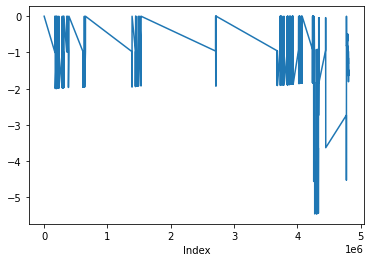

In [11]:
Daily_Drawdown.plot()